In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('/content/placement.csv')

In [10]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


100,4 implies 100 rows and 4 columns

Let's check the difference

In [12]:
import matplotlib.pyplot as plt

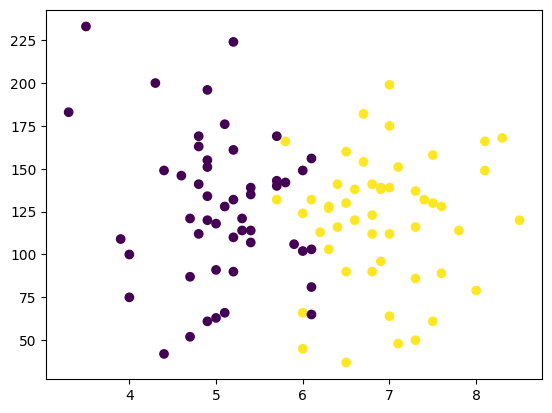

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
#without writing c=df['placement'] the dots will be in same color

1: Let's preprocess the data: EDA + Feature Selection

In [14]:
df=df.iloc[:,1:]
#above iloc function is used in order to execute the[:,1:] i.e all rows and from column 1 onwards selection

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


After EDA on understanding the data that it's linear
plot now the time
is for building a ML model,
model can be Logistic Regression s linear

In [16]:
#separating the data

x=df.iloc[:,0:2] #0:2 do not include 2
y=df.iloc[:,-1]

In [18]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [20]:
x.shape

(100, 2)

In [21]:
y.shape

(100,)

Technically to sho the trained data I'm performing the test step before scaling

In [23]:
#To train we need sklearn.model's train_test_split
from sklearn.model_selection import train_test_split

In [25]:
train_test_split(x,y,test_size=0.1)

[    cgpa     iq
 71   6.1  132.0
 97   6.7  182.0
 9    5.1   66.0
 25   5.0   91.0
 46   5.3  114.0
 ..   ...    ...
 74   6.7  154.0
 42   7.6   89.0
 58   8.0   79.0
 64   7.0   64.0
 26   7.0  199.0
 
 [90 rows x 2 columns],
     cgpa     iq
 92   5.2  110.0
 80   4.9  196.0
 51   4.8  141.0
 94   4.7   52.0
 49   5.4  135.0
 30   7.6  128.0
 29   7.0  112.0
 75   4.8  169.0
 66   6.9   96.0
 67   5.0  118.0,
 71    1
 97    1
 9     0
 25    0
 46    0
      ..
 74    1
 42    1
 58    1
 64    1
 26    1
 Name: placement, Length: 90, dtype: int64,
 92    0
 80    0
 51    0
 94    0
 49    0
 30    1
 29    1
 75    0
 66    1
 67    0
 Name: placement, dtype: int64]

In [26]:
#let's store above
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [28]:
x_train

,cgpa,iq
68,4.0,75.0
11,6.9,138.0
66,6.9,96.0
48,6.6,138.0
42,7.6,89.0
...,...,...
97,6.7,182.0
90,7.3,86.0
96,4.4,42.0
80,4.9,196.0


In [29]:
y_train

68    0
11    1
66    1
48    1
42    1
     ..
97    1
90    1
96    0
80    0
14    0
Name: placement, Length: 90, dtype: int64

In [30]:
#scaling
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [33]:
x_train=scaler.fit_transform(x_train)

In [34]:
x_train

array([[-1.72391671, -1.20453527],
       [ 0.85307219,  0.37167405],
       [ 0.85307219, -0.67913216],
       [ 0.58648713,  0.37167405],
       [ 1.47510399, -0.85426653],
       [ 0.94193387,  0.39669324],
       [-0.65757648,  0.22155888],
       [ 0.05331701,  0.02140531],
       [ 0.40876376, -0.17874825],
       [-1.10188491, -0.05365227],
       [-1.45733165,  1.92286417],
       [ 0.1421787 ,  0.82201957],
       [-0.21326805,  0.49677003],
       [ 1.3862423 , -1.55480401],
       [-0.92416153, -1.55480401],
       [ 1.03079556,  0.69692359],
       [ 0.85307219,  0.39669324],
       [ 1.20851893, -1.83001516],
       [-0.74643816,  1.32240348],
       [-0.12440636,  0.47175083],
       [-0.74643816, -1.42970803],
       [ 0.31990207,  0.12148209],
       [ 0.1421787 , -1.05442009],
       [-0.4798531 , -0.22878664],
       [ 0.7642105 , -0.00361388],
       [ 0.7642105 ,  0.44673164],
       [ 1.29738062,  0.22155888],
       [-2.16822514,  2.74849762],
       [-1.01302322,

In [37]:
#using transform here as pattern already understood at time of training
x_test=scaler.transform(x_test)

In [38]:
x_test

array([[  5.8, 166. ],
       [  7.5, 130. ],
       [  4.8, 169. ],
       [  5. ,  91. ],
       [  6.3, 103. ],
       [  7.5, 158. ],
       [  8.1, 166. ],
       [  7.3, 116. ],
       [  5.1, 128. ],
       [  7.1,  48. ]])

Training model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf= LogisticRegression()

In [41]:
#training
clf.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_predict= clf.predict(x_test)

In [45]:
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [43]:
y_test

85    1
83    1
75    0
25    0
98    1
91    1
65    1
72    1
86    0
5     1
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_predict)

0.8

In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

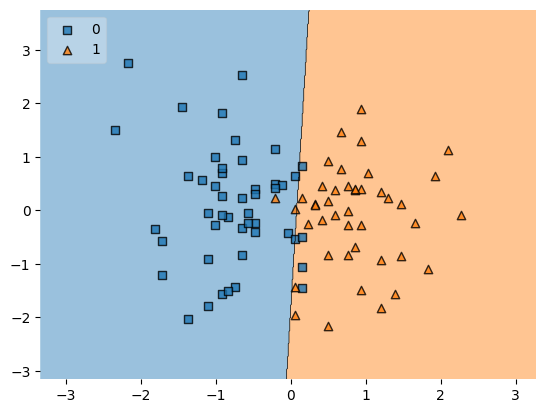

In [49]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model.pkl','wb'))